In [1]:
import os
from keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from keras import layers
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}
train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'
train_airplane_dir = 'train/000_airplane'
train_automobile_dir = 'train/001_automobile'
train_bird_dir = 'train/002_bird'
train_cat_dir = 'train/003_cat'
train_deer_dir = 'train/004_deer'
train_dog_dir = 'train/005_dog'
train_frog_dir = 'train/006_frog'
train_horse_dir = 'train/007_horse'
train_ship_dir = 'train/008_ship'
train_truck_dir = 'train/009_truck'

validation_airplane_dir = 'validation/000_airplane'
validation_automobile_dir = 'validation/001_automobile'
validation_bird_dir = 'validation/002_bird'
validation_cat_dir = 'validation/003_cat'
validation_deer_dir = 'validation/004_deer'
validation_dog_dir = 'validation/005_dog'
validation_frog_dir = 'validation/006_frog'
validation_horse_dir = 'validation/007_horse'
validation_ship_dir = 'validation/008_ship'
validation_truck_dir = 'validation/009_truck'

test_airplane_dir = 'test/000_airplane'
test_automobile_dir = 'test/001_automobile'
test_bird_dir = 'test/002_bird'
test_cat_dir = 'test/003_cat'
test_deer_dir = 'test/004_deer'
test_dog_dir = 'test/005_dog'
test_frog_dir = 'test/006_frog'
test_horse_dir = 'test/007_horse'
test_ship_dir = 'test/008_ship'
test_truck_dir = 'test/009_truck'


print('total training airplane images:', len(os.listdir(train_airplane_dir)))
print('total training automobile images:', len(os.listdir(train_automobile_dir)))
print('total training bird images:', len(os.listdir(train_bird_dir)))
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training deer images:', len(os.listdir(train_deer_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total training frog images:', len(os.listdir(train_frog_dir)))
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training ship images:', len(os.listdir(train_ship_dir)))
print('total training truck images:', len(os.listdir(train_truck_dir)))

print('total validation airplane images:', len(os.listdir(validation_airplane_dir)))
print('total validation automobile images:', len(os.listdir(validation_automobile_dir)))
print('total validation bird images:', len(os.listdir(validation_bird_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation deer images:', len(os.listdir(validation_deer_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))
print('total validation frog images:', len(os.listdir(validation_frog_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation ship images:', len(os.listdir(validation_ship_dir)))
print('total validation truck images:', len(os.listdir(validation_truck_dir)))

print('total test airplane images:', len(os.listdir(test_airplane_dir)))
print('total test automobile images:', len(os.listdir(test_automobile_dir)))
print('total test bird images:', len(os.listdir(test_bird_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test deer images:', len(os.listdir(test_deer_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))
print('total test frog images:', len(os.listdir(test_frog_dir)))
print('total test horse images:', len(os.listdir(test_horse_dir)))
print('total test ship images:', len(os.listdir(test_ship_dir)))
print('total test truck images:', len(os.listdir(test_truck_dir)))

2024-06-21 20:07:54.597033: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 20:07:56.614072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


total training airplane images: 3995
total training automobile images: 4026
total training bird images: 3968
total training cat images: 3984
total training deer images: 4001
total training dog images: 4063
total training frog images: 3970
total training horse images: 3999
total training ship images: 3975
total training truck images: 4019
total validation airplane images: 1005
total validation automobile images: 974
total validation bird images: 1032
total validation cat images: 1016
total validation deer images: 999
total validation dog images: 937
total validation frog images: 1030
total validation horse images: 1001
total validation ship images: 1025
total validation truck images: 981
total test airplane images: 2000
total test automobile images: 2000
total test bird images: 2000
total test cat images: 2000
total test deer images: 2000
total test dog images: 2000
total test frog images: 2000
total test horse images: 2000
total test ship images: 1974
total test truck images: 2000


In [2]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 32

train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20)

Found 40000 files belonging to 10 classes.


2024-06-21 20:08:04.992014: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-21 20:08:05.587142: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-21 20:08:05.587222: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-21 20:08:05.593805: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-21 20:08:05.593857: I external/local_xla/xla/stream_executor

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 32, 32, 3)
labels batch shape: (20, 10)


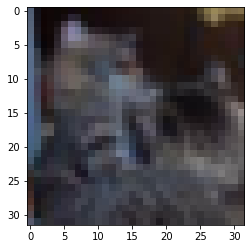

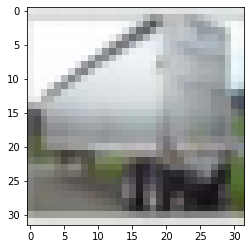

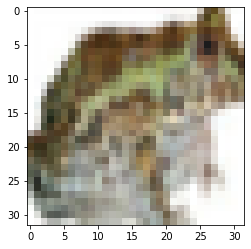

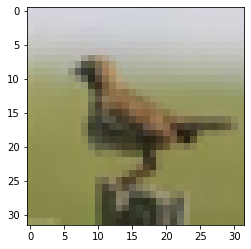

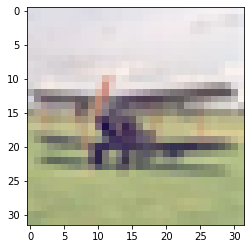

2024-06-21 20:08:11.852361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [5]:
# Define the objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate,momentum=0.9),metrics=['acc'])
    callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=10),
]
    history = model.fit(train_dataset,epochs=50,validation_data=validation_dataset,callbacks=callbacks_list)

    val_accuracy = max(history.history['val_acc'])
    return val_accuracy

In [6]:
# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best learning rate found
print('Best learning rate: ', study.best_params['learning_rate'])

[I 2024-06-21 20:08:11,877] A new study created in memory with name: no-name-7f8f77ca-37e3-4d0a-bf66-d30332b500a0


Epoch 1/50


I0000 00:00:1718996892.720926  352721 service.cc:145] XLA service 0x7ff93c00a8d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718996892.721238  352721 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-06-21 20:08:12.781188: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-21 20:08:12.963902: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  43/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.0945 - loss: 2.3105  

I0000 00:00:1718996898.178755  352721 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - acc: 0.2175 - loss: 2.0855 - val_acc: 0.3933 - val_loss: 1.6456
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3966 - loss: 1.6290 - val_acc: 0.4191 - val_loss: 1.6390
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.4549 - loss: 1.4843 - val_acc: 0.5038 - val_loss: 1.4004
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.4934 - loss: 1.3857 - val_acc: 0.5029 - val_loss: 1.3748
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5196 - loss: 1.3321 - val_acc: 0.4563 - val_loss: 1.6105
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5466 - loss: 1.2655 - val_acc: 0.5134 - val_loss: 1.3652
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.5578 - loss: 1.2403 - val_acc: 0.5881 - val_loss: 1.1636
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.5782 - loss: 1.1902 - val_acc: 0.5258 - val_loss: 1.3861
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/s

[I 2024-06-21 20:13:42,004] Trial 0 finished with value: 0.6629999876022339 and parameters: {'learning_rate': 0.007002955501079027}. Best is trial 0 with value: 0.6629999876022339.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - acc: 0.0975 - loss: 2.3081 - val_acc: 0.1232 - val_loss: 2.2996
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1119 - loss: 2.2947 - val_acc: 0.1470 - val_loss: 2.2784
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.1405 - loss: 2.2585 - val_acc: 0.2237 - val_loss: 2.1951
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1954 - loss: 2.1543 - val_acc: 0.2340 - val_loss: 2.0817
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2257 - loss: 2.0707 - val_acc: 0.2519 - val_loss: 2.0386
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2427 - loss: 2.0329 - val_acc: 0.2691 - val_loss: 2.0037
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2646 - loss: 1.9956 - val_acc: 0.2824 - val_loss: 1.9653
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2766 - loss: 1.9683 - val_acc: 0.2923 - val_loss: 1.9454
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:20:40,383] Trial 1 finished with value: 0.5843999981880188 and parameters: {'learning_rate': 0.00010870788200965383}. Best is trial 0 with value: 0.6629999876022339.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - acc: 0.2209 - loss: 2.0731 - val_acc: 0.4234 - val_loss: 1.5882
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.4165 - loss: 1.5901 - val_acc: 0.4910 - val_loss: 1.4109
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.4705 - loss: 1.4453 - val_acc: 0.5294 - val_loss: 1.3208
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.5089 - loss: 1.3542 - val_acc: 0.5411 - val_loss: 1.2613
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.5436 - loss: 1.2688 - val_acc: 0.5598 - val_loss: 1.2461
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.5662 - loss: 1.2143 - val_acc: 0.6030 - val_loss: 1.1195
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5860 - loss: 1.1581 - val_acc: 0.5739 - val_loss: 1.1940
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.6007 - loss: 1.1191 - val_acc: 0.5786 - val_loss: 1.2170
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:27:44,056] Trial 2 finished with value: 0.7099000215530396 and parameters: {'learning_rate': 0.00562144906966487}. Best is trial 2 with value: 0.7099000215530396.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.0974 - loss: 2.3122 - val_acc: 0.0999 - val_loss: 2.3170
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0969 - loss: 2.3122 - val_acc: 0.0999 - val_loss: 2.3129
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1014 - loss: 2.3102 - val_acc: 0.0999 - val_loss: 2.3161
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0988 - loss: 2.3112 - val_acc: 0.0999 - val_loss: 2.3153
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0967 - loss: 2.3121 - val_acc: 0.0999 - val_loss: 2.3160
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0986 - loss: 2.3113 - val_acc: 0.0999 - val_loss: 2.3161
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0989 - loss: 2.3117 - val_acc: 0.0999 - val_loss: 2.3138
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.0990 - loss: 2.3115 - val_acc: 0.0999 - val_loss: 2.3147
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:29:26,887] Trial 3 finished with value: 0.09989999979734421 and parameters: {'learning_rate': 0.07374993963703289}. Best is trial 2 with value: 0.7099000215530396.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.2214 - loss: 2.0829 - val_acc: 0.3136 - val_loss: 1.7800
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3903 - loss: 1.6576 - val_acc: 0.3784 - val_loss: 1.6802
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.4345 - loss: 1.5357 - val_acc: 0.4776 - val_loss: 1.4236
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.4725 - loss: 1.4445 - val_acc: 0.4838 - val_loss: 1.4101
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5041 - loss: 1.3677 - val_acc: 0.5341 - val_loss: 1.3009
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5253 - loss: 1.3229 - val_acc: 0.5162 - val_loss: 1.3333
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5406 - loss: 1.2953 - val_acc: 0.5730 - val_loss: 1.2424
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5550 - loss: 1.2619 - val_acc: 0.5356 - val_loss: 1.2859
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:33:11,852] Trial 4 finished with value: 0.6258000135421753 and parameters: {'learning_rate': 0.008316797012804982}. Best is trial 2 with value: 0.7099000215530396.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.1039 - loss: 2.3078 - val_acc: 0.1487 - val_loss: 2.3004
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1182 - loss: 2.2968 - val_acc: 0.1960 - val_loss: 2.2664
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1803 - loss: 2.2132 - val_acc: 0.2244 - val_loss: 2.0674
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2198 - loss: 2.0702 - val_acc: 0.2567 - val_loss: 2.0058
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2513 - loss: 2.0095 - val_acc: 0.3018 - val_loss: 1.9235
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2863 - loss: 1.9281 - val_acc: 0.3355 - val_loss: 1.8317
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.3161 - loss: 1.8560 - val_acc: 0.3129 - val_loss: 1.8683
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3372 - loss: 1.7975 - val_acc: 0.3633 - val_loss: 1.7186
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:40:11,195] Trial 5 finished with value: 0.6294000148773193 and parameters: {'learning_rate': 0.00016367285164273738}. Best is trial 2 with value: 0.7099000215530396.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - acc: 0.1058 - loss: 2.3022 - val_acc: 0.0937 - val_loss: 2.3050
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.1003 - loss: 2.3046 - val_acc: 0.0974 - val_loss: 2.3056
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0992 - loss: 2.3046 - val_acc: 0.0937 - val_loss: 2.3054
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1015 - loss: 2.3046 - val_acc: 0.0937 - val_loss: 2.3055
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1011 - loss: 2.3045 - val_acc: 0.0937 - val_loss: 2.3056
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1002 - loss: 2.3047 - val_acc: 0.0937 - val_loss: 2.3054
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1010 - loss: 2.3047 - val_acc: 0.0937 - val_loss: 2.3053
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1027 - loss: 2.3047 - val_acc: 0.0937 - val_loss: 2.3057
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:41:46,162] Trial 6 finished with value: 0.09740000218153 and parameters: {'learning_rate': 0.02008249547333035}. Best is trial 2 with value: 0.7099000215530396.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.1019 - loss: 2.3089 - val_acc: 0.1120 - val_loss: 2.2992
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1079 - loss: 2.2993 - val_acc: 0.1595 - val_loss: 2.2953
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1135 - loss: 2.2942 - val_acc: 0.1682 - val_loss: 2.2888
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1278 - loss: 2.2868 - val_acc: 0.1776 - val_loss: 2.2762
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1415 - loss: 2.2701 - val_acc: 0.1899 - val_loss: 2.2463
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1715 - loss: 2.2324 - val_acc: 0.2097 - val_loss: 2.1847
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1860 - loss: 2.1705 - val_acc: 0.2202 - val_loss: 2.1150
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1972 - loss: 2.1168 - val_acc: 0.2358 - val_loss: 2.0712
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:48:52,619] Trial 7 finished with value: 0.44940000772476196 and parameters: {'learning_rate': 4.562231856076466e-05}. Best is trial 2 with value: 0.7099000215530396.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - acc: 0.0954 - loss: 2.3113 - val_acc: 0.0999 - val_loss: 2.3122
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.0948 - loss: 2.3097 - val_acc: 0.0999 - val_loss: 2.3114
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.0975 - loss: 2.3097 - val_acc: 0.0999 - val_loss: 2.3112
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.0992 - loss: 2.3095 - val_acc: 0.0999 - val_loss: 2.3128
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0971 - loss: 2.3089 - val_acc: 0.0999 - val_loss: 2.3124
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0970 - loss: 2.3097 - val_acc: 0.0999 - val_loss: 2.3172
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0984 - loss: 2.3092 - val_acc: 0.0999 - val_loss: 2.3113
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.0987 - loss: 2.3095 - val_acc: 0.0999 - val_loss: 2.3134
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:52:14,279] Trial 8 finished with value: 0.09989999979734421 and parameters: {'learning_rate': 0.060357823505843414}. Best is trial 2 with value: 0.7099000215530396.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - acc: 0.1094 - loss: 2.3034 - val_acc: 0.1795 - val_loss: 2.2727
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.1673 - loss: 2.2169 - val_acc: 0.2489 - val_loss: 2.0743
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2317 - loss: 2.0628 - val_acc: 0.2810 - val_loss: 1.9868
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2686 - loss: 1.9675 - val_acc: 0.3210 - val_loss: 1.8818
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3097 - loss: 1.8663 - val_acc: 0.3542 - val_loss: 1.7806
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3465 - loss: 1.7801 - val_acc: 0.3779 - val_loss: 1.6938
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3672 - loss: 1.7173 - val_acc: 0.3997 - val_loss: 1.6486
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.3899 - loss: 1.6600 - val_acc: 0.4214 - val_loss: 1.5802
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 20:59:14,472] Trial 9 finished with value: 0.654699981212616 and parameters: {'learning_rate': 0.0002694245856439571}. Best is trial 2 with value: 0.7099000215530396.


Best learning rate:  0.00562144906966487
